## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [69]:
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math

%matplotlib inline

In [35]:
df = pd.read_csv('data/human_body_temperature.csv')
df.head()
df.size

390

NormaltestResult(statistic=2.7408984269759546, pvalue=0.25399283691381375)

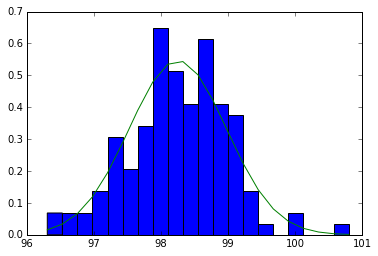

In [86]:
#  1. Is the distribution of body temperatures normal?

n, temp, patches = plt.hist(df['temperature'],bins=20,normed=1)
mu = np.mean(df['temperature'])
sigma = np.std(df['temperature'])
plt.plot(temp, mlab.normpdf(temp, mu, sigma))
sp.stats.mstats.normaltest(n)

Distribution of body temperature is more or less normal with some values that fall well outside of the curve.

In [93]:
#  2.  Is the true population mean really 98.6 degrees F?
avgtemp = df['temperature'].mean()
stdev = df['temperature'].std()
stderror = stdev/130**0.5
score = (98.6-avgtemp)/stderror
print(avgtemp,stderror,score)

(98.24923076923078, 0.06430441683789101, 5.454823292364079)


The mean for this sample of 130 points is 98.249.  The std error is 0.0643.  The hypothesis that the population mean is 98.6 degrees gives this a z-score of 5.45 which basically means that the probability that it is 98.6 is REALLY LOW, approximately ~0.

It's better to use a z-test because we have more than 30 samples.  


In [95]:
#  3. At what temperature should we consider someone's temperature to be "abnormal"?
#     - Start by computing the margin of error and confidence interval.

significance = 0.05   # 5% two-tail (2.5% on either side)
zscore = 1.96
tempconf = [avgtemp - zscore*stderror, avgtemp + zscore*stderror]
print(tempconf)
# Define abnormal as being 1 standard deviation from the mean
abtemp = [tempconf[0] - stdev, tempconf[1] + stdev]
print(abtemp)


[98.12319411222852, 98.37526742623304]
[97.39001095418958, 99.10845058427198]


The temperature should be considered abnormal if it falls outside the range [97.39,99.108] degrees F.

In [106]:
# 4.  Is there a significant difference between males and females in normal temperature?
#    - Set up and solve for a two sample hypothesis testing.

df.head()

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


In [109]:
women = df.temperature[df.gender=='F']
womenavg = women.mean()
womenstd = women.std()
men = df.temperature[df.gender=='M']
menavg = men.mean()
menstd = men.std()


In [111]:
diffmean = womenavg - menavg
stderror = (womenstd**2/len(women) + menstd**2/len(men))**0.5
print(diffmean, stderror)


(0.289230769230727, 0.12655395041982642)


In [112]:
diffmean/stderror


2.285434538165274

The z-score here is 2.285 which corresponds to a p-value of 0.011156.  This means that there is a 1.1% chance that the difference in sample mean temperature between men and women equal to 0.289 degrees for a null hypothesis that there is no difference in mean temperature between the two genders.  In other words, there is strong evidence that there IS a difference in mean body temperature between men and women.